In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

dataset_id = "PXD027742" # Indicate Dataset Here
#Datasets: PXD027742, MSV000086004, MSV000086809

filepath = dataset_id + "/psm.TSV"
info_path = dataset_id + "/sdrf.xlsx" # Decide on what file extension to use for sdrf files

psm_df = pd.read_csv(filepath, delimiter = "\t")
sdrf_df = pd.read_excel(info_path)

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.95]

datasets = psm_df["Spectrum File"].unique()

# psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*(.+)\.pep\.xml$") # Likely will not be needed

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                               'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                               'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df = pd.melt(psm_df, id_vars=['Spectrum File'], value_vars=["126","127C","127N","128C","128N","129C","129N","130C",
                                                                "130N","131C","131N","132C","132N","133C","133N","134N"])



data_dict = {}
info_dict = {}
for dataset in datasets:
    data_dict[dataset] = psm_df.loc[psm_df["Spectrum File"] == dataset]
    info_dict[dataset] = sdrf_df.loc[sdrf_df["file name"] == dataset]
    
    

# psm_df = psm_df.loc[(psm_df["Spectrum File"] == "D:\\Users\\PCL_user\\Mass_Spec\\data\\TMT_sc_data\\Datasets\\MSV000086004\\output\\interact-hs0105.pep.xml")]

psm_df

# psm_df["value"] = psm_df["value"].apply(np.log10)
# psm_df["value"] = np.log10(psm_df["value"].replace(0, np.nan))



,Spectrum File,variable,value
0,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,126,68821.4219
1,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,126,25854.0000
2,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,126,8347.7002
3,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,126,6406.8696
4,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,126,27575.8379
...,...,...,...
1001323,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,134N,92923.7578
1001324,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,134N,20343.8477
1001325,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,134N,16767.6719
1001326,D:\Users\PCL_user\Mass_Spec\data\TMT_sc_data\D...,134N,39631.2070


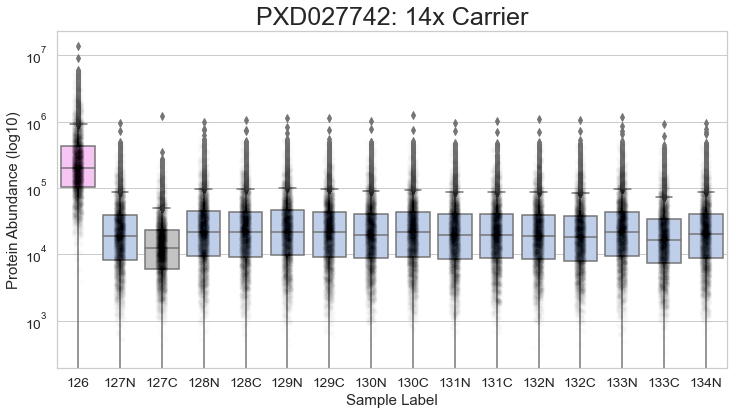

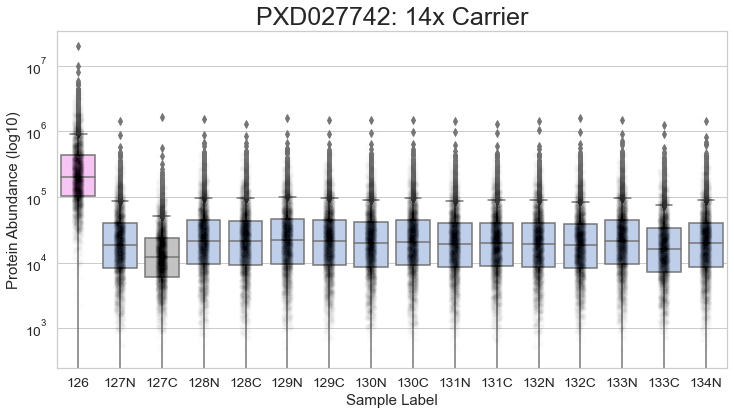

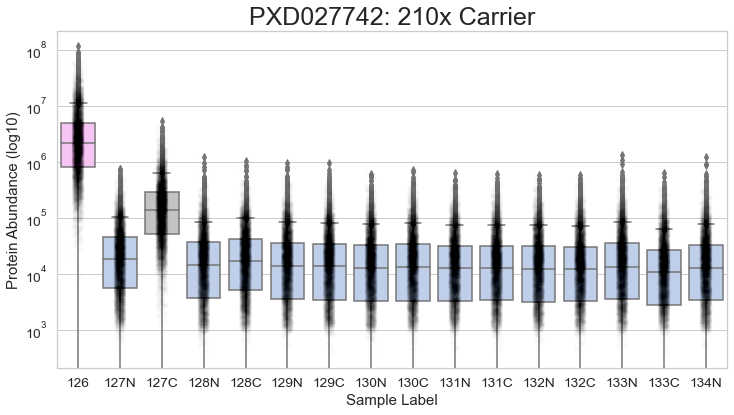

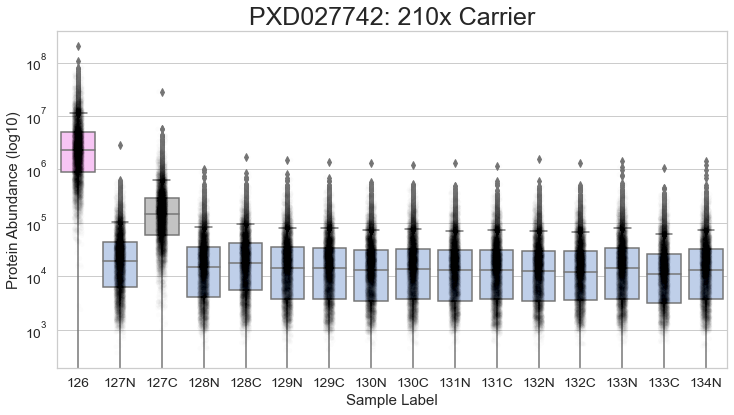

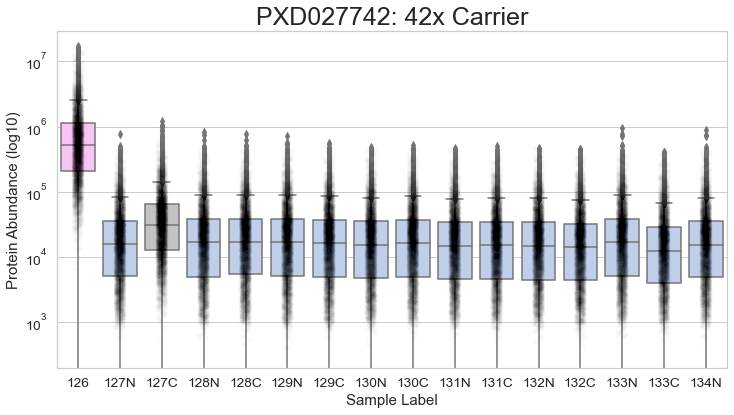

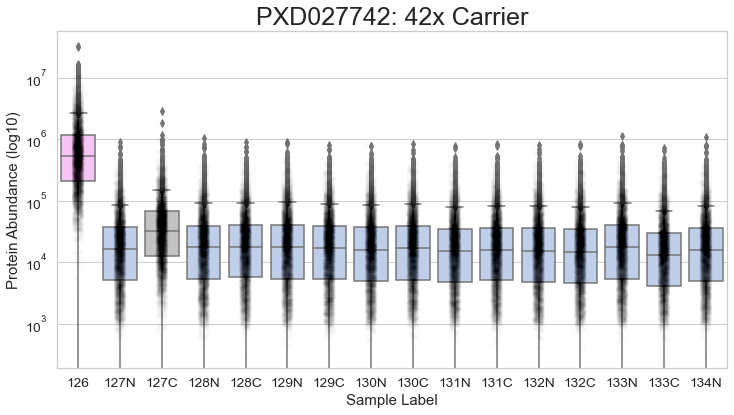

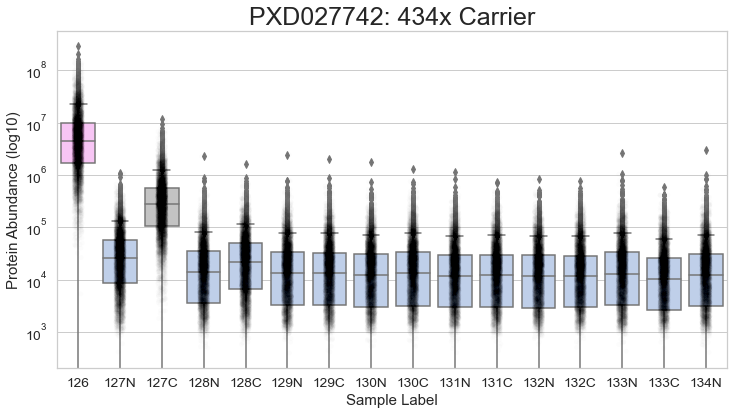

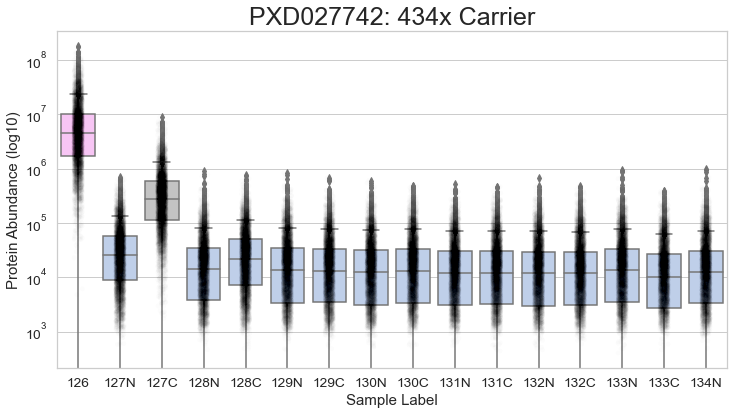

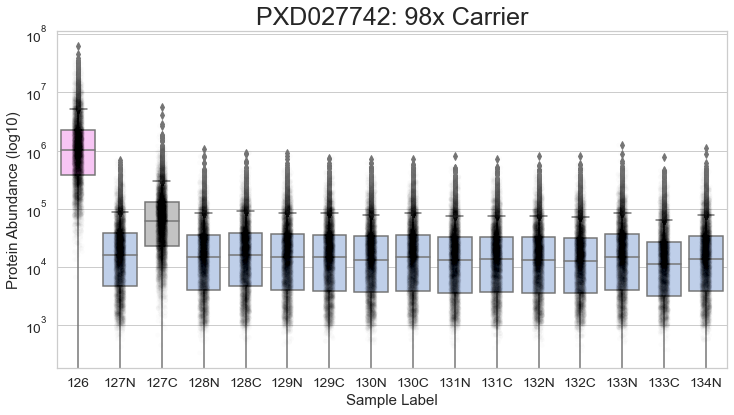

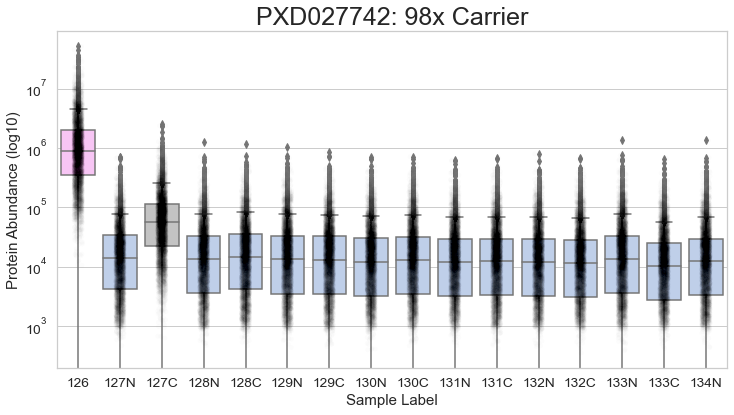

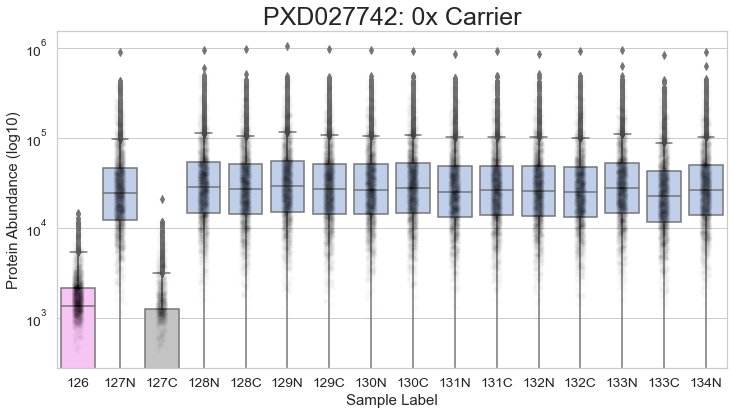

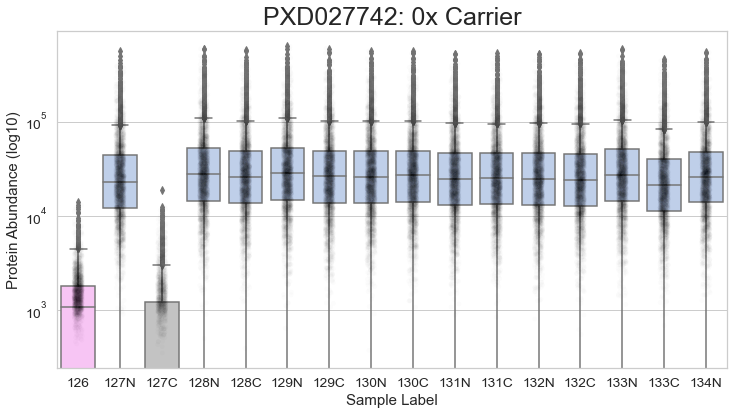

In [21]:
# color_match = {"126": "#FFBDFC", "127N": "#FFBDFC", "127C": "#FFBDFC", "128N": "#FFBDFC",  "128C": "#FFBDFC",
#                "129N": "#FFBDFC", "129C": "#FFBDFC", "130N": "#FCFF99", "130C": "#B8CDF0", "131N": "#FF8C8E",
#                "131C": "#FCFF99", "132N": "#B8CDF0", "132C": "#FF8C8E", "133N": "#FCFF99", "133C": "#B8CDF0", "134N": "#FF8C8E"}



for dataset in datasets:
    curr_df = data_dict[dataset]
    info_df = info_dict[dataset]
    
    info_df.reset_index(drop=True, inplace=True)
    
    channel_colors = {"boost": "#FFBDFC", "reference": "#FCFF99", "blank": "#C3C3C3", "single": "#B8CDF0"}
    
    # build a new color_match dictionary using the label and type columns from info_dict
        
    channels = info_df["label"]
    color_match = {}
    boost_volume = 0
    
    for channel in channels:
        row = info_df.index[info_df["label"] == channel].tolist()[0]
        channel_type = info_df["type"].iloc[row]
        if (channel_type == "boost"):
            boost_volume += info_df["cell_equivalents"].iloc[row]
        
        color_match[str(channel)] = channel_colors[channel_type]
    
    plt.figure(figsize=(12, 6.2025)) # Original: (16, 8.27)
    # sns.set_palette(sns.color_palette(colors))
    
    sns.set(font_scale=1.25)
    sns.set_style("whitegrid")

    boxplot = sns.boxplot(data=curr_df, x="variable", y="value", palette = color_match,
                      order=["126","127N","127C","128N","128C","129N","129C","130N",
                             "130C","131N","131C","132N","132C","133N","133C","134N"])

    boxplot.set_title(dataset_id + ": " + str(round(boost_volume)) + "x Carrier", fontsize=25)
    boxplot = sns.stripplot(data=curr_df, x="variable", y="value", color='0', jitter=True, alpha=0.01, 
                     order=["126","127N","127C","128N","128C","129N","129C","130N",
                            "130C","131N","131C","132N","132C","133N","133C","134N"])

    boxplot.set(xlabel="Sample Label", ylabel="Protein Abundance (log10)")

    # plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3', 'legendEntry4', 'legendEntry5', '6', '7', '8'])
    # sns.move_legend(boxplot, "center left")

    plt.yscale('log')
    # plt.savefig(dataset_id + "/" + dataset + "_abundance_figure.png", dpi=400)
    plt.show()
    